# Day 10: Elves Look, Elves Say

In [1]:
import re
from itertools import chain, groupby

import pandas as pd
import seaborn as sns

from tools import loader, parsers

DATA = parsers.string(loader.get(2015, 10))

The first thing that comes to mind is regexp, naturally. It's pretty easy to find repetitions with `(\d)\1*`.

In [2]:
def look_and_say(string: str = DATA) -> dict[int, int]:
    stats = {0: len(string)}
    for i in range(50):
        new_string = ''
        for group in re.finditer(r'(\d)\1*', string):
            new_string += f'{len(group[0])}{group[0][0]}'
        string = new_string
        stats[i] = len(new_string)
    return stats


stats = look_and_say()
print(stats[39])
print(stats[49])

492982
6989950


It's quite slow, though, especially in part 2, as the string explodes in length now that we are doing 50 iterations instead of 40. We are also constructing a new string at every step, which is inefficient. 

Axes(0.125,0.11;0.775x0.77)


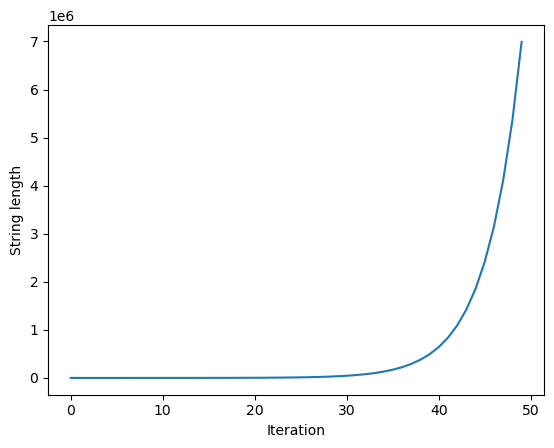

In [3]:
lengths = pd.DataFrame(stats.items(), columns=['Iteration', 'String length'])
ax = sns.lineplot(data=lengths, x='Iteration', y='String length')
print(ax)

Our input contains only digits, so it would be better if we could just do away with strings altogether. We can do so with itertools' groupby(). Still not stellar, but it goes from ~26 seconds down to ~10 on my hardware. Not great, not terrible.

In [4]:
def look_and_say(sequence: str, cycles: int) -> int:
    sequence = list(map(int, sequence))
    for _ in range(cycles):
        sequence = list(chain.from_iterable((len(list(j)), i) for i, j in groupby(sequence)))
    return len(sequence)


print(look_and_say(DATA, 40))
print(look_and_say(DATA, 50))

492982
6989950
